In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
df = pd.read_csv("house_prices.csv")
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Size                    20000 non-null  float64
 1   Number of rooms         20000 non-null  float64
 2   Location                20000 non-null  float64
 3   Distance of the center  20000 non-null  float64
 4   Years of construction   20000 non-null  float64
 5   Date                    20000 non-null  object 
 6   Country                 20000 non-null  object 
 7   Build quality           20000 non-null  int64  
 8   Price final             20000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 1.4+ MB


(None,
        Size  Number of rooms  Location  Distance of the center  \
 0  0.935726         0.921034  0.050417                0.173085   
 1  0.945854         0.084170  0.211671                0.080723   
 2  0.425973         0.190178  0.221490                0.443040   
 3  0.599944         0.237729  0.584219                0.387131   
 4  0.293112         0.322832  0.065941                0.615047   
 
    Years of construction        Date  \
 0               0.139500  12/09/1995   
 1               0.980385  17/06/2015   
 2               0.768223  22/10/2001   
 3               0.034368  05/04/2008   
 4               0.849242  15/12/1997   
 
                                         Country  Build quality  Price final  
 0                                         Ghana              7       643428  
 1                              Christmas Island              4       939085  
 2                       Cocos (Keeling) Islands              8       149126  
 3  South Georgia and the

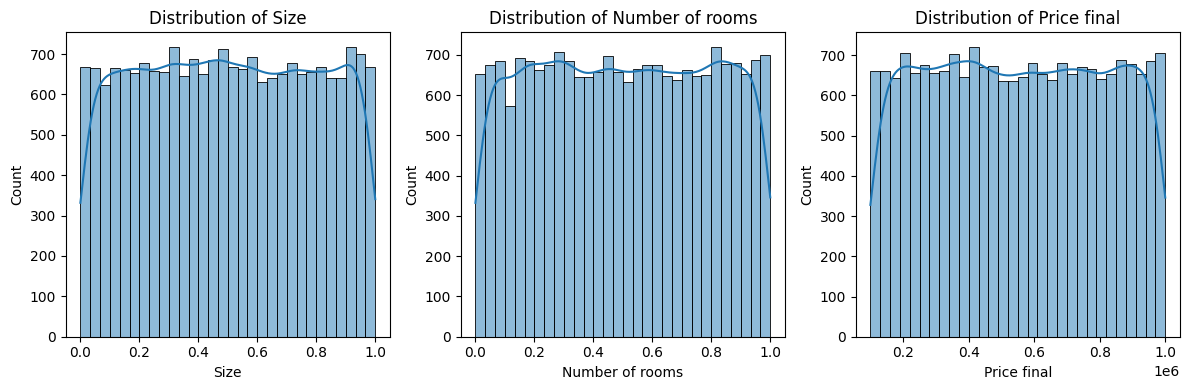

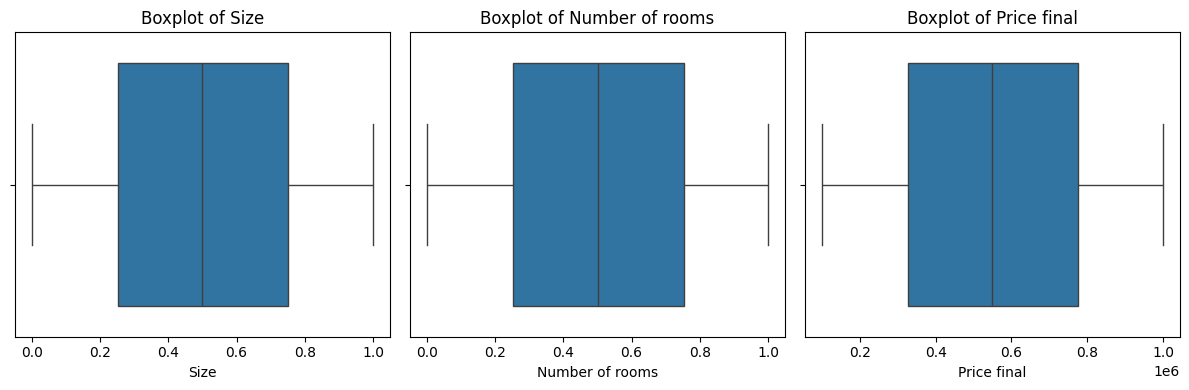

In [24]:
# Check for missing values
missing_values = df.isnull().sum()
# Numerical columns for analysis
numeric_cols = ["Size", "Number of rooms", "Price final"]

# Plot distributions
plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Check for outliers using boxplots
plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [25]:
# Normalize numerical features
scaler = MinMaxScaler()
df[["Size", "Number of rooms"]] = scaler.fit_transform(df[["Size", "Number of rooms"]])
# Use Label Encoding instead of One-Hot Encoding for Location
label_encoder = LabelEncoder()
df["Location"] = label_encoder.fit_transform(df["Location"])

# Display the first few rows after encoding
df.head()


,Size,Number of rooms,Location,Distance of the center,Years of construction,Date,Country,Build quality,Price final
0,0.935785,0.921058,990,0.173085,0.139500,12/09/1995,Ghana,7,643428
1,0.945914,0.084171,4202,0.080723,0.980385,17/06/2015,Christmas Island,4,939085
2,0.425995,0.190181,4370,0.443040,0.768223,22/10/2001,Cocos (Keeling) Islands,8,149126
3,0.599979,0.237734,11697,0.387131,0.034368,05/04/2008,South Georgia and the South Sandwich Islands,5,951468
4,0.293124,0.322839,1301,0.615047,0.849242,15/12/1997,Niger,7,357705


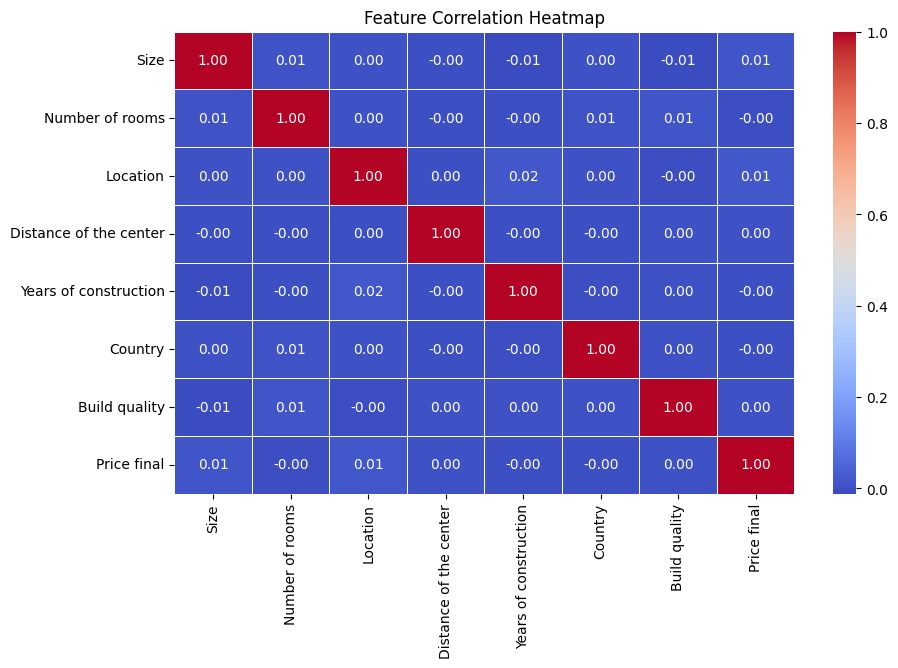

,Price final
Price final,1.000000
Location,0.012795
Size,0.009599
Build quality,0.001615
Distance of the center,0.001490
Years of construction,-0.001505
Country,-0.003149
Number of rooms,-0.004401


In [26]:
# Apply Label Encoding to "Country"
df["Country"] = label_encoder.fit_transform(df["Country"])

# Check if the 'Date' column exists before dropping it
if 'Date' in df.columns:
    df = df.drop(columns=["Date"])
else:
    print("Column 'Date' not found in DataFrame.")

# Re-attempt feature correlation analysis
correlation_matrix = df.corr()

# Extract correlations with the target variable (Price final)
correlation_with_target = correlation_matrix["Price final"].sort_values(ascending=False)

# Plot heatmap for correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Display correlation values with the target variable
correlation_with_target

In [27]:
# Drop the low-impact feature "Country"
df = df.drop(columns=["Country"])

# Define features (X) and target variable (y)
X = df.drop(columns=["Price final"])
y = df["Price final"]

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mae, mse, r2)

(223341.76707249458, 66659409069.69941, -0.0009725814104499797)